In [1]:
!pip install Ktrain

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [3]:
df = pd.read_csv('SMSSpamCollection',sep="\t",names =['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

data_train.shape,   data_test.shape

((4457, 2), (1115, 2))

In [6]:
(X_train, y_train), (X_test, y_test),preproc =text.texts_from_df(train_df=data_train,
                                                                text_column ='text',
                                                                label_columns='label',
                                                                val_df=data_test,
                                                                preprocess_mode='bert')  #or can use distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [7]:
# Build the classifier

model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [8]:
# Here we have taken batch size as 6 as from the documentation it is recommendesd to use with maxlen as 500..
lerner = ktrain.get_learner(model = model, train_data=(X_train, y_train),
                           val_data=(X_test, y_test),
                            batch_size=6)

In [9]:
lerner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 457s 584ms/step - loss: 0.2308 - accuracy: 0.9253
Epoch 2/2
743/743 [==============================] - 159s 214ms/step - loss: 1.2937 - accuracy: 0.8046


done.
Visually inspect loss plot and select learning rate associated with falling loss


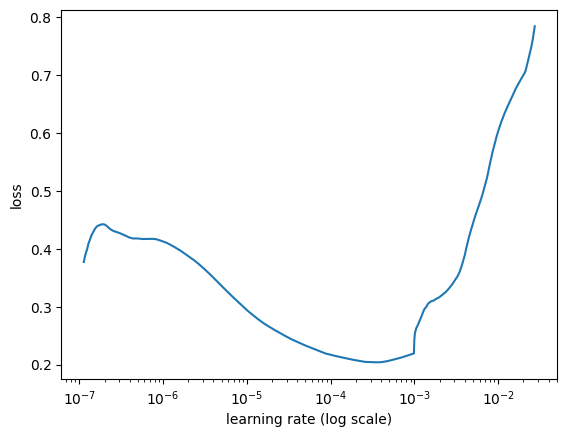

In [10]:
lerner.lr_find(show_plot=True, max_epochs=2)

In [16]:
# Essentially fit is very basic training loop,
#    whereas fit one cycle uses the one cycle policy callback

lerner.fit_onecycle(lr = 0.00005777338, epochs = 1)
predictor = ktrain.get_predictor(lerner.model, preproc)
predictor.save("bertspam-classifier")



begin training using onecycle policy with max lr of 5.777338e-05...
743/743 [==============================] - 476s 641ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 0.0171 - val_accuracy: 0.9937


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
msg1 = ["network operator. The service is free. For T & C's visit 80488.biz" ]      #spam

msg2 = ["Those cocksuckers. If it makes you feel better ipads are worthless garbage novelty items and you should feel bad for even wanting one"]  #ham

In [18]:
predictor.predict(msg1)

['spam']

In [19]:
predictor.predict(msg2)

['ham']